In [12]:
from sympy import symbols, Function, Eq, dsolve
t = symbols('t')
S = Function('S')(t)
I = Function('I')(t)
R = Function('R')(t)
gamma = symbols('gamma')

# Define the differential equations with beta tending to 0
eq1 = Eq(S.diff(t), 0)
eq2 = Eq(I.diff(t), - 0.44 * I)
eq3 = Eq(R.diff(t), 0.44 * I)

# Solve the system of differential equations
sol = dsolve([eq1,
              eq2,
              eq3])

# Display the solution
print("Analytical Solution:")
print(sol)

Analytical Solution:
[Eq(S(t), 1.0*C1), Eq(I(t), -1.0*C2*exp(-0.44*t)), Eq(R(t), 1.0*C2*exp(-0.44*t) + 1.0*C3)]


[Eq(S(t), 762.0), Eq(I(t), 800.0*exp(-0.44*t)), Eq(R(t), 800.0 - 800.0*exp(-0.44*t))]


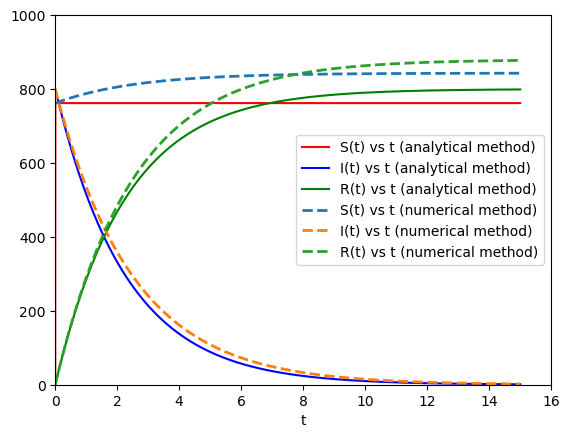

In [25]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

t = sp.Symbol("t")
S = sp.Function("S")
I = sp.Function("I")
R = sp.Function("R")

g = 0.44
b = 0

ode1 = S(t).diff(t) + b * S(t) * I(t)
ode2 = I(t).diff(t) - b * S(t) * I(t) + g * I(t)
ode3 = R(t).diff(t) - g * I(t)
eq_sys = [sp.Eq(ode1, 0), sp.Eq(ode2, 0), sp.Eq(ode3, 0)]

par_sys_sol = sp.dsolve(eq_sys, [S(t), I(t), R(t)], ics={S(0): 762, I(0): 800, R(0): 0})
print(par_sys_sol)

part_sol_S = sp.lambdify(t, (par_sys_sol[0].rhs) * (t**0.00000001), modules="numpy")
part_sol_I = sp.lambdify(t, par_sys_sol[1].rhs, modules="numpy")
part_sol_R = sp.lambdify(t, par_sys_sol[2].rhs, modules="numpy")

time = np.linspace(0, 15, 10000)

fig, ax = plt.subplots(1, 1)
ax.set_xlim(0, 16)
ax.set_ylim(0, 1000)
ax.set_xlabel("t")

ax.plot(time, part_sol_S(time), color="red", label="S(t) vs t (analytical method)")
ax.plot(time, part_sol_I(time), color="blue", label="I(t) vs t (analytical method)")
ax.plot(time, part_sol_R(time), color="green", label="R(t) vs t (analytical method)")

def rk2_sys(f, time, initial, h):
    points = np.arange(time[0], time[1] + 0.000001, h)
    n = len(points)
    sol = np.zeros((len(initial), n))
    sol[0, 0] = initial[0]
    sol[1, 0] = initial[1]
    sol[2, 0] = initial[2]
    for i in range(1, n):
        values = {t: points[i - 1], S: sol[0, i - 1], I: sol[1, i - 1], R: sol[2, i - 1]}
        k1 = f.subs(values)[0]
        k1_ = f.subs(values)[1]
        k1__ = f.subs(values)[2]
        k2 = f.subs({t: points[i - 1] + h, S: sol[0, i - 1] + h * k1, I: sol[1, i - 1] + h * k1})[0]
        k2_ = f.subs({t: points[i - 1] + h, S: sol[0, i - 1] + h * k1_, I: sol[1, i - 1] + h * k1_})[1]
        k2__ = f.subs({t: points[i - 1] + h, S: sol[0, i - 1] + h * k1_, I: sol[1, i - 1] + h * k1_})[2]

        sol[0, i] = sol[0, i - 1] + h * (1 / 2) * (k1 + k2)
        sol[1, i] = sol[1, i - 1] + h * (1 / 2) * (k1_ + k2_)
        sol[2, i] = sol[2, i - 1] + h * (1 / 2) * (k1__ + k2__)

    return sol, points

S = sp.Symbol("S")
I = sp.Symbol("I")
R = sp.Symbol("R")
t = sp.Symbol("t")

f = sp.Matrix([0.00005 * S * I, (0.00005 * S * I - g * I), g * I])
time1 = [0, 15]
initial = [762, 800, 0]
h = 0.05

rk2_soln, points = rk2_sys(f, time1, initial, h)
ax.plot(points, rk2_soln[0], ls="--", label="S(t) vs t (numerical method)", linewidth = '2')
ax.plot(points, rk2_soln[1], ls="--", label="I(t) vs t (numerical method)", linewidth = '2')
ax.plot(points, rk2_soln[2], ls="--", label="R(t) vs t (numerical method)", linewidth = '2')

ax.legend()
plt.show()

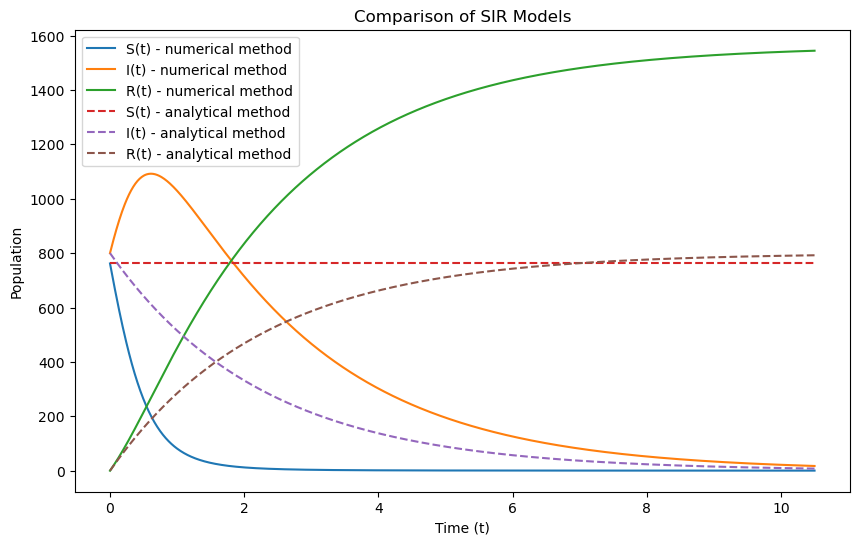

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the system of ODEs
def model1(y, t):
    S, I, R = y
    beta = 0.00218
    gamma = 0.44
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]
def model2(y, t):
    S, I, R = y
    beta = 0
    gamma = 0.44
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

# Parameters for the numerical method
initial_conditions1 = [762, 800, 0]

# Parameters for the analytical method
initial_conditions2 = [762, 800, 0]

# Time span
time_span = np.linspace(0, 10.5, 1000)

# Solve the system using odeint for both scenarios
solution1 = odeint(model1, initial_conditions1, time_span)
solution2 = odeint(model2, initial_conditions2, time_span)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(time_span, solution1[:, 0], label='S(t) - numerical method')
ax.plot(time_span, solution1[:, 1], label='I(t) - numerical method')
ax.plot(time_span, solution1[:, 2], label='R(t) - numerical method')

# Plot the results for the analytical method
ax.plot(time_span, solution2[:, 0], linestyle='--', label='S(t) - analytical method')
ax.plot(time_span, solution2[:, 1], linestyle='--', label='I(t) - analytical method')
ax.plot(time_span, solution2[:, 2], linestyle='--', label='R(t) - analytical method')

ax.set_xlabel('Time (t)')
ax.set_ylabel('Population')
ax.set_title('Comparison of SIR Models')
ax.legend()

plt.show()